In [1]:
import lightgbm
import pandas as pd
import numpy as np
import time
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

json_columns = ['device', 'geoNetwork','totals', 'trafficSource']
def dataframe(filename):
    path = filename
    df = pd.read_csv(path, converters={column: json.loads for column in json_columns}, 
                     dtype={'fullVisitorId': 'str'})
    
    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

train = dataframe("train.csv")
test = dataframe("test.csv")

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
const_columns = [column for column in train.columns if train[column].nunique(dropna=False)==1]
const_columns

['socialEngagementType',
 'device_browserSize',
 'device_browserVersion',
 'device_flashVersion',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_cityId',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation',
 'totals_visits',
 'trafficSource_adwordsClickInfo.criteriaParameters']

In [6]:
drop_columns = const_columns + ['sessionId']

In [15]:
test = test.drop(drop_columns, axis=1, inplace=True)

KeyError: "labels ['socialEngagementType' 'device_browserSize' 'device_browserVersion'\n 'device_flashVersion' 'device_language' 'device_mobileDeviceBranding'\n 'device_mobileDeviceInfo' 'device_mobileDeviceMarketingName'\n 'device_mobileDeviceModel' 'device_mobileInputSelector'\n 'device_operatingSystemVersion' 'device_screenColors'\n 'device_screenResolution' 'geoNetwork_cityId' 'geoNetwork_latitude'\n 'geoNetwork_longitude' 'geoNetwork_networkLocation' 'totals_visits'\n 'trafficSource_adwordsClickInfo.criteriaParameters' 'sessionId'] not contained in axis"

In [11]:
drop_columns


['socialEngagementType',
 'device_browserSize',
 'device_browserVersion',
 'device_flashVersion',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_cityId',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation',
 'totals_visits',
 'trafficSource_adwordsClickInfo.criteriaParameters',
 'sessionId']

In [16]:
test = test.drop("sessionId", axis=1, inplace=True)

KeyError: "labels ['sessionId'] not contained in axis"

In [17]:
test.shape

(804684, 33)

In [18]:
train.shape

(903653, 55)

In [19]:
json_columns = ['device', 'geoNetwork','totals', 'trafficSource']
def dataframe(filename):
    path = filename
    df = pd.read_csv(path, converters={column: json.loads for column in json_columns}, 
                     dtype={'fullVisitorId': 'str'})
    
    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

train = dataframe("train.csv")
test = dataframe("test.csv")

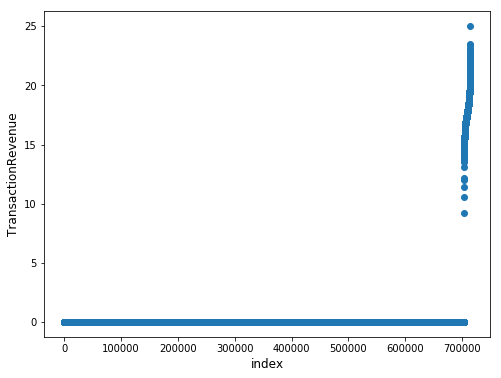

In [21]:
train["totals_transactionRevenue"] = train["totals_transactionRevenue"].astype('float')
gdf = train.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals_transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [23]:
train.fullVisitorId.nunique()

714167

In [24]:
len(train.fullVisitorId)

903653

In [25]:
test.fullVisitorId.nunique()

617242

In [27]:
len(test.fullVisitorId)

804684

In [29]:
903653-714167

189486

In [30]:
constant_columns = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]

In [31]:
set(train.columns).difference(set(test.columns))

{'totals_transactionRevenue', 'trafficSource_campaignCode'}

In [32]:
constant_columns

['socialEngagementType',
 'device_browserSize',
 'device_browserVersion',
 'device_flashVersion',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_cityId',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation',
 'totals_visits',
 'trafficSource_adwordsClickInfo.criteriaParameters']

In [34]:
train_copy = train
test_copy = test

In [35]:
test = test.drop(constant_columns, axis=1)

In [36]:
train = train.drop(constant_columns, axis=1)

In [37]:
train=train.drop("sessionId", axis=1)

In [39]:
train=train.drop("trafficSource_campaignCode", axis=1)

In [40]:
train["totals_transactionRevenue"].fillna(0, inplace=True)

In [42]:
train_y = train["totals_transactionRevenue"].values

In [43]:
train_id = train["fullVisitorId"].values

In [44]:
test_id = test["fullVisitorId"].values

In [56]:
category_columns = ["channelGrouping", "device_browser", 
                "device_deviceCategory", "device_operatingSystem", 
                "geoNetwork_city", "geoNetwork_continent", 
                "geoNetwork_country", "geoNetwork_metro",
                "geoNetwork_networkDomain", "geoNetwork_region", 
                "geoNetwork_subContinent", "trafficSource_adContent", 
                "trafficSource_adwordsClickInfo.adNetworkType", 
                "trafficSource_adwordsClickInfo.gclId", 
                "trafficSource_adwordsClickInfo.page", 
                "trafficSource_adwordsClickInfo.slot", "trafficSource_campaign",
                "trafficSource_keyword", "trafficSource_medium", 
                "trafficSource_referralPath", "trafficSource_source",
                'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_isTrueDirect']

In [57]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
for column in category_columns:
    print(column)
    label = preprocessing.LabelEncoder()
    label.fit(list(train[column].values.astype('str')) + list(test[column].values.astype('str')))
    train[column] = label.transform(list(train[column].values.astype('str')))
    test[column] = label.transform(list(test[column].values.astype('str')))

channelGrouping
device_browser
device_deviceCategory
device_operatingSystem
geoNetwork_city
geoNetwork_continent
geoNetwork_country
geoNetwork_metro
geoNetwork_networkDomain
geoNetwork_region
geoNetwork_subContinent
trafficSource_adContent
trafficSource_adwordsClickInfo.adNetworkType
trafficSource_adwordsClickInfo.gclId
trafficSource_adwordsClickInfo.page
trafficSource_adwordsClickInfo.slot
trafficSource_campaign
trafficSource_keyword
trafficSource_medium
trafficSource_referralPath
trafficSource_source
trafficSource_adwordsClickInfo.isVideoAd
trafficSource_isTrueDirect


In [53]:
train.columns


Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source'],
      dtype='object')

In [58]:
train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,...,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,9,20160902,1131660440785968503,1472830385,1,1472830385,111,0,False,19,...,54456,1,3,3,29,1,113,5,2442,122
1,9,20160902,377306020877927890,1472880147,1,1472880147,122,0,False,6,...,54456,1,3,3,29,1,113,5,2442,122
2,9,20160902,3895546263509774583,1472865386,1,1472865386,111,0,False,19,...,54456,1,3,3,29,1,113,5,2442,122
3,9,20160902,4763447161404445595,1472881213,1,1472881213,118,0,False,5,...,54456,1,3,3,29,1,677,5,2442,122
4,9,20160902,27294437909732085,1472822600,2,1472822600,111,1,True,1,...,54456,1,3,3,29,0,113,5,2442,122


In [59]:
numerical_columns = ["totals_hits", "totals_pageviews", "visitNumber", "visitStartTime", 
                     "totals_bounces",  "totals_newVisits"]    
for column in numerical_columns:
    train[column] = train[column].astype(float)
    test[column] = test[column].astype(float)

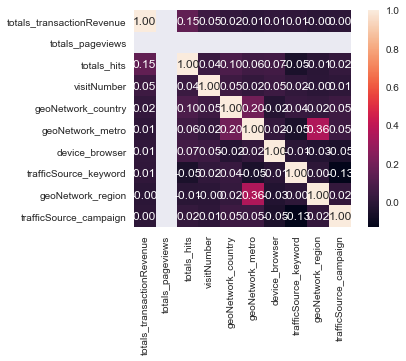

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
spearman_correlation = train.corr(method='spearman')
pick_columns=spearman_correlation.nlargest(10, 'totals_transactionRevenue').index
correlationmap = np.corrcoef(train[pick_columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlationmap, cbar=True, annot=True, square=True , fmt='.2f', 
                      yticklabels=pick_columns.values, xticklabels=pick_columns.values)
plt.show()

In [61]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [70]:
import datetime
develop = train[train['date']<=20170531]
valid = train[train['date']>20170531]
develop_y = np.log1p(develop["totals_transactionRevenue"].values)
valid_y = np.log1p(valid["totals_transactionRevenue"].values)

develop_X = develop[category_columns + numerical_columns] 
valid_X = valid[category_columns + numerical_columns] 
test_X = test[category_columns + numerical_columns] 

In [73]:
develop.shape

(765707, 34)

In [74]:
valid.shape

(137946, 34)

In [75]:
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }

In [76]:
lgtrain = lgb.Dataset(develop_X, label=develop_y)

In [77]:
lgval = lgb.Dataset(valid_X, label=valid_y)

In [78]:
model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.69901
[200]	valid_0's rmse: 1.69526
Early stopping, best iteration is:
[197]	valid_0's rmse: 1.69508


In [79]:
model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.69901
[200]	valid_0's rmse: 1.69526
Early stopping, best iteration is:
[197]	valid_0's rmse: 1.69508


In [80]:
pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)

In [84]:
pred_val_y = model.predict(valid_X, num_iteration=model.best_iteration)

In [85]:
from sklearn import metrics
pred_val_y[pred_val_y<0] = 0

In [86]:
valid_prediction_df = pd.DataFrame({"fullVisitorId":valid["fullVisitorId"].values})

In [87]:
valid_prediction_df["transactionRevenue"] = valid["totals_transactionRevenue"].values

In [88]:
valid_prediction_df["PredictedRevenue"] = np.expm1(pred_val_y)

In [89]:
valid_prediction_df = valid_prediction_df.groupby("fullVisitorId")["transactionRevenue", 
                                                                   "PredictedRevenue"].sum().reset_index()

In [90]:
print(np.sqrt(metrics.mean_squared_error(np.log1p(valid_prediction_df["transactionRevenue"].values), 
                                         np.log1p(valid_prediction_df["PredictedRevenue"].values))))

1.71221049605665


In [91]:
submission = pd.DataFrame({"fullVisitorId":test_id})
pred_test_y[pred_test_y<0] = 0
submission["PredictedLogRevenue"] = np.expm1(pred_test_y)
submission = submission.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
submission.columns = ["fullVisitorId", "PredictedLogRevenue"]
submission["PredictedLogRevenue"] = np.log1p(submission["PredictedLogRevenue"])
submission.to_csv("submit4.csv", index=False)

In [92]:
submission.head()

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.322690
1,0000049363351866189,0.020859
2,0000053049821714864,0.000000
3,0000059488412965267,0.348848
4,0000085840370633780,0.056383


In [93]:
value=sorted(submission)

In [101]:
value = []
len(submission)

617242